Prueba de filtros para Dentem Tutor
Creado por Lex Ortega

Para ejecutar:
1. Crear carpeta resources en la carpeta content
2. Colocar dentro la imagen que se desea procesar, en este caso solo toma una imagen por vez
3. Ejecutar cada uno de los bloques, entiendase un bloque por filtro.

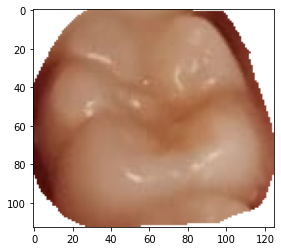

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('/content/resources/10.png')

plt.imshow(image)

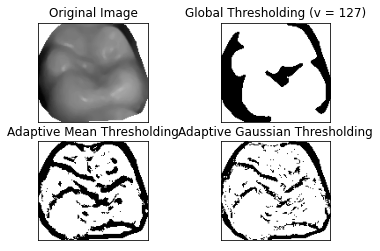

In [2]:
## --> FILTRO BINARIO
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread("/content/resources/10.png",0)
img = cv2.medianBlur(img,5)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
miArray = np.arange(4)
for i in miArray:
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

TypeError: ignored

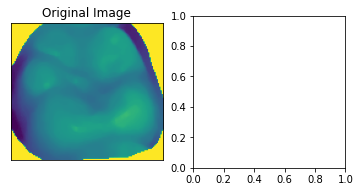

In [1]:
## --> FILTRO BINARIO (eligiendo el mejor)
import cv2
import numpy as np
from matplotlib import pyplot as plt

# leer la imagen en escala de grises
img = cv2.imread("/content/resources/10.png",0)
#img = cv2.imread("/content/resources/527.png", cv2.IMREAD_COLOR) 

## ---- Este bloque si funciona, con la lectura de imagen y parametro 0 -----
# Para quitar un poco el ruido  img = cv2.medianBlur(img,5)
# Aplicar filtro   th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
## ---------------------------------------------------------------------------

# Eliminar ruido
img = cv2.medianBlur(img, 7)
      
# Aplicar combinacion de filtros           
x=cv2.Sobel(img,cv2.CV_16S,1,0)
y=cv2.Sobel(img,cv2.CV_16S,0,1)

absx=cv2.convertScaleAbs(x)
absy=cv2.convertScaleAbs(y)
dist=cv2.addWeighted(absx,0.5,absy,0.5,0)

#sal = cv2.cvtColor(dist, cv2.COLOR_BGR2GRAY)
th2 = cv2.adaptiveThreshold(dist, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Guardar imagen ya procesada en grises
cv2.imwrite("/content/tmp/10.png", th2)

#Volver a leer la imagen, pero ahora a color
img2 = cv2.imread("/content/tmp/10.png", cv2.IMREAD_COLOR) 

# Imprimir
titles = ['Original Image', 'Adaptive Mean Thresholding']
images = [img, img2]
miArray = np.arange(2)
for i in miArray:
 plt.subplot(1,2,i+1), plt.imshow(images[i])
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

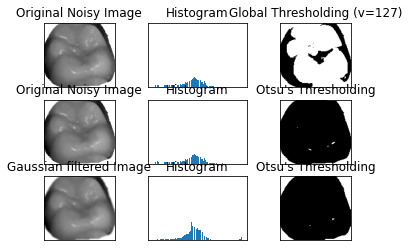

In [3]:
## --> FILTRO OTSU
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread("/content/resources/10.png",0)
 
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
miArray = np.arange(3)
for i in miArray:
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

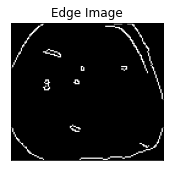

In [5]:
## --> FILTRO CANNY

import cv2
import numpy as np
import matplotlib.pyplot as plt

## Se usa la primera vez para indicarle que debe conectar el drive
##  tambien se debe crear la carpeta y subir los archivos a utilizar
#from google.colab import drive
#drive.mount('/content/resources')

## Este codigo se usa para subir los archivos a mano uno por uno
#uploaded = files.upload()
#img = Image.open(BytesIO(uploaded['1-1.jpg']))


## Una vez que ya estan los archivos arriba, se puede acceder directo a la ruta
img=cv2.imread("/content/resources/10.png", cv2.IMREAD_COLOR)
plt.imshow(img)


plt.subplot(121), plt.imshow(img, cmap= "gray")
plt.title("Original image"), plt.yticks([])

edges = cv2.Canny(img, 100, 200)
plt.subplot(121),plt.imshow(edges, cmap="gray")
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

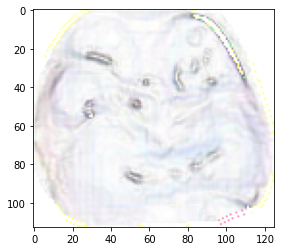

In [6]:
## --> FILTRO SOBEL
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/resources/10.png", cv2.IMREAD_COLOR)

x=cv2.Sobel(img,cv2.CV_16S,1,0)
y=cv2.Sobel(img,cv2.CV_16S,0,1)

absx=cv2.convertScaleAbs(x)
absy=cv2.convertScaleAbs(y)
dist=cv2.addWeighted(absx,0.5,absy,0.5,0)

ret, binary = cv2.threshold(dist, 127, 255, cv2.THRESH_TOZERO_INV)
#sal = cv2.cvtColor(binary, cv2.COLOR_BGR2GRAY)
inverted_image = np.invert(binary)
plt.imshow(inverted_image) 

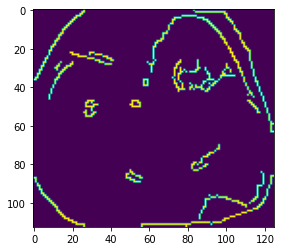

In [7]:
## FILTRO usando DETECTOR DE CONTORNOS
import cv2

#imagen original
img=cv2.imread("/content/resources/10.png", cv2.IMREAD_COLOR)

#escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Imagen borrosa
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Deteccion de bordes
edged = cv2.Canny(blurred, 10, 100)

## Mostrar resultado
plt.imshow(edged) 

20 CONTOURS FOUNDED


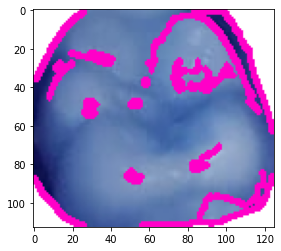

In [8]:
# Deteccion de contornos
contours,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copia de original
img_cpy = img.copy()

# Dibujar contornos en la copia
cv2.drawContours(img_cpy, contours, -1, (255,0,200), 2)

#Contornos encontrados
print("{} CONTOURS FOUNDED".format(len(contours)))

#Muestra resultados
plt.imshow(img_cpy) 

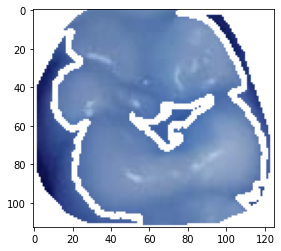

In [9]:
# Encontrar contornos
import cv2
 
img = cv2.imread('/content/resources/10.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

ret, thresh2 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 120, 255, cv2.THRESH_TOZERO_INV)

#plt.imshow(thresh5)

contours, hierarchy = cv2.findContours(thresh5, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours,-1,(255,255,255),2)
plt.imshow(img) 

36 Contornos encontrados


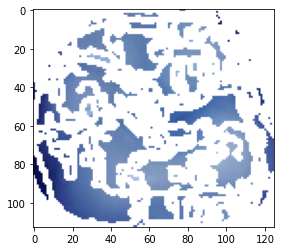

In [10]:
## Armar filtro con sobel y contornos

import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/resources/10.png", cv2.IMREAD_COLOR)

x=cv2.Sobel(img,cv2.CV_16S,1,0)
y=cv2.Sobel(img,cv2.CV_16S,0,1)

absx=cv2.convertScaleAbs(x)
absy=cv2.convertScaleAbs(y)
dist=cv2.addWeighted(absx,0.5,absy,0.5,0)

##plt.imshow(dist) 

#escala de grises
gray = cv2.cvtColor(dist, cv2.COLOR_BGR2GRAY)

# Imagen borrosa
#blurred = cv2.GaussianBlur(gray, (3, 3), 0)
ret, blurred = cv2.threshold(gray, 120, 255, cv2.THRESH_TOZERO_INV)

# Deteccion de bordes
edged = cv2.Canny(blurred, 10, 100)

# Deteccion de contornos
contours,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copia de original
img_cpy = img.copy()

# Dibujar contornos en la copia
cv2.drawContours(img_cpy, contours, -1, (255,255,255), 2)

#Contornos encontrados
print("{} Contornos encontrados".format(len(contours)))

#Muestra resultados
plt.imshow(img_cpy) 

In [11]:
#Para instalar kornia
#  --> Solo se hace una vez al principio
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 565 kB 5.0 MB/s 


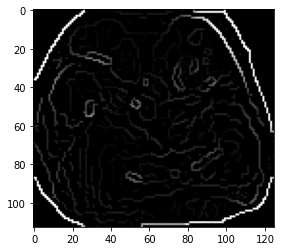

In [12]:
## FILTRO usando KORNIA

import cv2
from matplotlib import pyplot as plt
import numpy as np

from PIL import Image 
from PIL import ImageOps


import torch
import torchvision
import kornia as K

img_bgr: np.ndarray = cv2.imread('/content/resources/10.png', cv2.IMREAD_COLOR)

x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)

#imshow(x_gray)

x_laplacian: torch.Tensor = K.filters.canny(x_gray)[0]
out = torchvision.utils.make_grid(x_laplacian, nrow=2, padding=9)
out_np: np.ndarray = K.utils.tensor_to_image(out)

## Para guardar la imagen en lugar de mostrarla
#salida.save( class="hljs-string">'new_name.png')

plt.imshow(out_np)